In [1]:
https://stackoverflow.com/questions/29528628/how-to-specify-a-variable-in-pandas-as-ordinal-categorical
# What this says is use factorize to convert discrete to categoricals.
# But use the custom mapper to convert ordinal to categorical, preserving the order
# So basically everything gets converted to numeric, but we factorize discrete, and ordinal, 
# we makes dummies from nominal

SyntaxError: invalid syntax (<ipython-input-1-85595b5a23a9>, line 1)

In [2]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams.update({'font.size': 12})

In [3]:
#Changing discrete to categorical
#Reading Data

housing_df = pd.read_excel('Data/AmesHousing.xls', delimiter=r"\s+")
housing_df['Order'] = housing_df['Order'].astype('object')
housing_df['Year Built'] = housing_df['Year Built'].astype('object')
housing_df['Year Remod/Add'] = housing_df['Year Remod/Add'].astype('object')
housing_df['Bsmt Full Bath'] = housing_df['Bsmt Full Bath'].astype('object')
housing_df['Bsmt Half Bath'] = housing_df['Bsmt Half Bath'].astype('object')
housing_df['Full Bath'] = housing_df['Full Bath'].astype('object')
housing_df['Half Bath'] = housing_df['Half Bath'].astype('object')
housing_df['Bedroom AbvGr'] = housing_df['Bedroom AbvGr'].astype('object')
housing_df['Kitchen AbvGr'] = housing_df['Kitchen AbvGr'].astype('object')
housing_df['TotRms AbvGrd'] = housing_df['TotRms AbvGrd'].astype('object')
housing_df['Fireplaces'] = housing_df['Fireplaces'].astype('object')
housing_df['Garage Yr Blt'] = housing_df['Garage Yr Blt'].astype('object')
housing_df['Garage Cars'] = housing_df['Garage Cars'].astype('object')
housing_df['Mo Sold'] = housing_df['Mo Sold'].astype('object')
housing_df['Yr Sold'] = housing_df['Yr Sold'].astype('object')



In [4]:
housing_df[:5]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


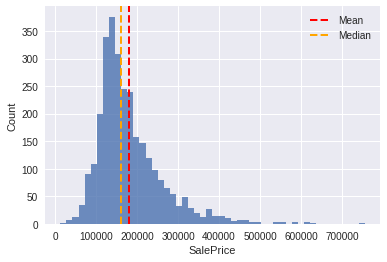

In [5]:
housing_df['SalePrice'].hist(bins=50, alpha=0.8)
plt.axvline(housing_df['SalePrice'].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(housing_df['SalePrice'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.legend()
plt.show()

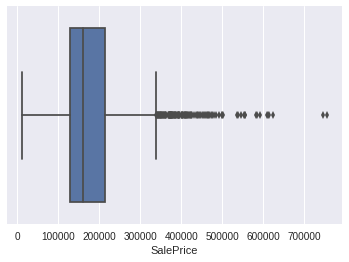

In [6]:
sns.boxplot(housing_df['SalePrice'], orient='h')
plt.show()

In [7]:
housing_df['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

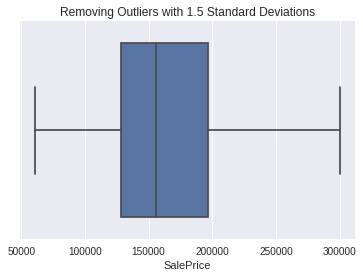

In [8]:
# Create function to reject outliers, default stdev is 1.5
def reject_outliers(data, m=1.5):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

# Box plot showing the outliers gone away with m=1.5
sns.boxplot(reject_outliers(housing_df['SalePrice']),
            orient='h').set_title('Removing Outliers with 1.5 Standard Deviations')
plt.show()

In [9]:
# Make series of mask
mask = reject_outliers(housing_df['SalePrice']).tolist()
mask[0:20]

[215000,
 105000,
 172000,
 244000,
 189900,
 195500,
 213500,
 191500,
 236500,
 189000,
 175900,
 185000,
 180400,
 171500,
 212000,
 164000,
 141000,
 210000,
 190000,
 170000]

In [10]:
# Mask as Boolean
mask_results = housing_df['SalePrice'].isin(mask)[0:20].tolist()
mask_results

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True]

In [11]:
outliers_dict = dict(zip(mask, mask_results))
outliers_dict

{105000: True,
 141000: True,
 164000: False,
 170000: True,
 171500: True,
 172000: True,
 175900: True,
 180400: True,
 185000: True,
 189000: True,
 189900: True,
 190000: True,
 191500: True,
 195500: True,
 210000: False,
 212000: True,
 213500: True,
 215000: True,
 236500: True,
 244000: True}

In [12]:
housing_df = housing_df[~housing_df['SalePrice'].isin(mask) == False]
housing_df.head(20)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [13]:
housing_df['SalePrice'].describe()

count      2673.000000
mean     165117.181444
std       51751.938795
min       61000.000000
25%      128000.000000
50%      155500.000000
75%      197000.000000
max      300000.000000
Name: SalePrice, dtype: float64

In [14]:
# Columns with null (np.nan) values
nan_col_list = housing_df.columns[housing_df.isnull().any()].tolist()
nan_col_list

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Electrical',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [15]:
nulls = housing_df[nan_col_list].isnull().sum()
nulls

Lot Frontage       471
Alley             2482
Mas Vnr Type        19
Mas Vnr Area        19
Bsmt Qual           74
Bsmt Cond           74
Bsmt Exposure       77
BsmtFin Type 1      74
BsmtFin SF 1         1
BsmtFin Type 2      75
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1390
Garage Type        145
Garage Yr Blt      147
Garage Finish      147
Garage Cars          1
Garage Area          1
Garage Qual        147
Garage Cond        147
Pool QC           2663
Fence             2115
Misc Feature      2569
dtype: int64

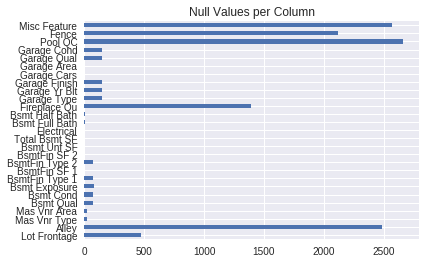

In [16]:
nulls.plot(kind='barh', title='Null Values per Column')
plt.show()

In [17]:
print('Missing data in each dataframe column:')
for col in housing_df.columns:
    missing_data = len(housing_df) - housing_df[col].count()
    if (missing_data > 0 or missing_data =='NaN'):
         print(col, ':', missing_data, 'missing values is', str(round(float(missing_data / float(len(housing_df))) * 
             100, 3)), '% of total')

Missing data in each dataframe column:
Lot Frontage : 471 missing values is 17.621 % of total
Alley : 2482 missing values is 92.854 % of total
Mas Vnr Type : 19 missing values is 0.711 % of total
Mas Vnr Area : 19 missing values is 0.711 % of total
Bsmt Qual : 74 missing values is 2.768 % of total
Bsmt Cond : 74 missing values is 2.768 % of total
Bsmt Exposure : 77 missing values is 2.881 % of total
BsmtFin Type 1 : 74 missing values is 2.768 % of total
BsmtFin SF 1 : 1 missing values is 0.037 % of total
BsmtFin Type 2 : 75 missing values is 2.806 % of total
BsmtFin SF 2 : 1 missing values is 0.037 % of total
Bsmt Unf SF : 1 missing values is 0.037 % of total
Total Bsmt SF : 1 missing values is 0.037 % of total
Electrical : 1 missing values is 0.037 % of total
Bsmt Full Bath : 2 missing values is 0.075 % of total
Bsmt Half Bath : 2 missing values is 0.075 % of total
Fireplace Qu : 1390 missing values is 52.001 % of total
Garage Type : 145 missing values is 5.425 % of total
Garage Yr Bl

In [18]:
col_na = ['Misc Feature',
          'Fence',
          'Pool QC',
          'Garage Cond',
          'Garage Qual',
          'Garage Finish',
          'Garage Type',
          'Fireplace Qu',
          'BsmtFin SF 1',
          'BsmtFin SF 2',
          'Bsmt Exposure',
          'Alley']

In [19]:
housing_df[col_na] = housing_df[col_na].fillna('NA')
print(housing_df.shape)
housing_df.head()

(2673, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NA,IR1,Lvl,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NA,IR1,Lvl,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900


In [20]:
# Function to make random distribution based on existing data
def make_randoms(df, col):
    return np.random.normal(df[col].mean(),
                            scale=df[col].std(),
                            size=df[col].isnull().sum()).astype(int)

In [21]:
# Use random number generator to create a series of numbers based on 'garage_yr_blt' statistics
garage_yr_blt_rand = make_randoms(housing_df,'Garage Yr Blt')
garage_yr_blt_rand

array([1977, 1905, 1945, 1999, 2013, 1941, 1930, 1978, 1960, 1988, 1988,
       1969, 1959, 2001, 2014, 1982, 1948, 1931, 1987, 1960, 1988, 1969,
       2011, 1973, 1998, 1964, 1931, 1982, 1988, 1971, 1968, 1970, 1993,
       1956, 1923, 1925, 1971, 1976, 1974, 1929, 2035, 1951, 1986, 1938,
       1975, 1992, 2026, 2017, 2018, 1997, 1977, 1979, 2001, 1983, 1954,
       1912, 1983, 1958, 1984, 1965, 1977, 1953, 2003, 1987, 1991, 1981,
       1966, 1950, 1971, 1982, 1975, 2000, 1987, 1996, 1992, 1969, 1958,
       2001, 1988, 1946, 1989, 1978, 1987, 1982, 1973, 1995, 1963, 1963,
       1967, 1950, 1942, 2008, 1974, 1971, 1975, 1975, 1967, 2038, 1984,
       1963, 1933, 1985, 1971, 1991, 1960, 2009, 1995, 1997, 1960, 1945,
       2009, 1994, 1932, 2007, 1945, 1950, 1957, 1950, 1971, 1946, 1979,
       1973, 1951, 1947, 2011, 1940, 1994, 1969, 1990, 1950, 1976, 1965,
       1981, 1979, 1921, 1980, 1933, 2021, 1988, 1992, 1971, 2019, 1971,
       1978, 1988, 1925, 1979])

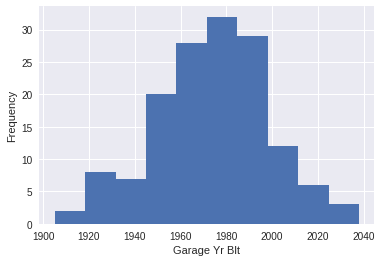

In [22]:
# Plot the random distribution of the 'garage_yr_blt' column
plt.hist(garage_yr_blt_rand)
plt.xlabel('Garage Yr Blt')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Use random number generator to create a series of numbers based on 'LotFrontage' statistics
lot_frontage_rand = make_randoms(housing_df,'Lot Frontage')
lot_frontage_rand

array([106,  72,  70,  26,  68,  94,  77,  25,  54,  49, 103,  64,  20,
        72,  97,  64,  26,  49,  73,  51,  55,  40,  24,  74,  65,  78,
        60,  53,  62,  41,  44,  72,  58,  44,  48,  47,  55,  90,  33,
        89,  45,  95,  27,  31,  61,  52,  35,  62,  29,  77,  62,  73,
        69,  47,  91,  47,  60,  25,  85,  44,  89,  39, 105,  70,  69,
        31, 104,  61,  51,  89,   9,  52,  52,  91,  70,  99,  70, 113,
        76,  84,  57,  21,  62,  54,  84,  22,  78,  92,  80,  99,  46,
        61,  63,  30,  28,  54,  39,  35,  68,  71,  90,  77,  92,  79,
        77,  81,  75,  98,  16,  72,  68, 102,  68,  49,  86,  38,  44,
        60,  30,  84,  95,  72,  45,  73,  61,  48,  73,  59,  28,  56,
        64,  62,  64,  64,  87,  82,  45,  66,  21,  56,  67,  36,  34,
        37,  98, 100,  62,  64,  67,  72,  37,  83,  56,  57,  44,  76,
        70,  71,  94,  89,  98,  78,  53,  80,  59, 104,  71,  97,  62,
        89,  89,  68,  46,  83,  71,  50,  41,  50,  90,  34,  9

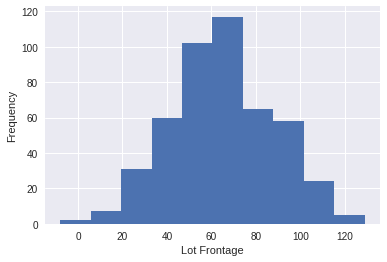

In [24]:
# Plot the random distribution of the 'LotFrontage' column
plt.hist(lot_frontage_rand)
plt.xlabel('Lot Frontage')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Replace the NaNs with the random data using this method because I don't
# have enough time to find a more efficient method
housing_df['Lot Frontage'] = housing_df['Lot Frontage'].fillna('9999')
housing_df['Garage Yr Blt'] = housing_df['Garage Yr Blt'].fillna('9999')
housing_df.loc[housing_df['Lot Frontage']=='9999','Lot Frontage'] = lot_frontage_rand
housing_df.loc[housing_df['Garage Yr Blt']=='9999','Garage Yr Blt'] = garage_yr_blt_rand

# Drop the rest
print('Before: ', housing_df.shape)
housing_df = housing_df.dropna()
print('After: ', housing_df.shape)


# Verify that all null values are gone
nan_col_list = housing_df.columns[housing_df.isnull().any()].tolist()
nan_col_list

nan_col_list = housing_df.columns[housing_df.isnull().any()].tolist()
nulls = housing_df[nan_col_list].isnull().sum()
nulls

housing_df.head(20)

Before:  (2673, 82)
After:  (2577, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141,31770,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,NA,IR1,Lvl,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,NA,IR1,Lvl,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78,9978,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41,4920,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43,5005,Pave,NA,IR1,HLS,...,0,NA,NA,NA,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39,5389,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60,7500,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,6,2010,WD,Normal,189000


In [26]:
# Re-index housing_df so indices match 
housing_df.reset_index(inplace=True)
housing_df.drop('index', axis=1, inplace=True)
housing_df.drop('Order', axis=1, inplace=True)
housing_df.drop('PID', axis=1, inplace=True)

In [37]:
housing_df.sample(20)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1856,20,RL,65,8775,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2007,WD,Normal,126000
1077,20,RL,82,9840,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,6,2008,WD,Normal,185000
2020,20,RL,69,7599,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,6,2007,WD,Normal,129500
12,60,RL,63,8402,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,5,2010,WD,Normal,180400
2146,20,FV,62,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2006,WD,Normal,176000
1563,20,FV,84,10440,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,5,2007,New,Partial,261329
2197,190,RL,79,13110,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,MnPrv,NA,0,7,2006,WD,Normal,146500
723,60,RL,68,10769,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2009,WD,Normal,212000
47,80,RL,77,7750,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2010,WD,Normal,180000
2050,50,RL,57,13837,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Normal,229000


In [38]:
cat_columns = housing_df.select_dtypes(include=[object]).columns.tolist()
dummies_df = pd.get_dummies(housing_df[cat_columns],prefix_sep='_',drop_first=False)
print(dummies_df.shape)

housing_df = pd.concat([housing_df, dummies_df], axis=1)
print(housing_df.shape)

housing_df.drop(cat_columns,axis=1,inplace=True)
print(housing_df.shape)

(2577, 1903)
(2577, 1983)
(2577, 1923)


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = housing_df.drop('SalePrice',axis=1)

In [41]:
y = housing_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

for dataset in [X_train, X_test, y_train, y_test]:
    print(dataset.shape)

(1932, 1922)
(645, 1922)
(1932,)
(645,)


In [54]:
def apply_scale(dataframe, scaling_function):
    numerical_df = dataframe.select_dtypes(include=[float])
    print(numerical_df.columns)
    numerical_df = scaling_function(numerical_df)
    tmp_df = dataframe.copy()
    tmp_df[numerical_df.columns] = numerical_df
    return tmp_df

def gelman_scale(dataframe):
    return (dataframe - dataframe.mean())/(2*dataframe.std())

def standard_scale(dataframe):
    return (dataframe - dataframe.mean())/(dataframe.std())

X_tr_gelman = apply_scale(X_train, gelman_scale)
X_te_gelman = apply_scale(X_test, gelman_scale)
X_tr_standard = apply_scale(X_train, standard_scale)
X_te_standard = apply_scale(X_test, standard_scale)

Index(['Mas Vnr Area', 'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Area'], dtype='object')
Index(['Mas Vnr Area', 'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Area'], dtype='object')
Index(['Mas Vnr Area', 'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Area'], dtype='object')
Index(['Mas Vnr Area', 'Bsmt Unf SF', 'Total Bsmt SF', 'Garage Area'], dtype='object')


In [55]:
#using gelman scaling. Not trying the log transform below
X_train_log_df = np.log(X_train)
scaler.fit(X_train_log_df)
X_tr_log_sc = scaler.transform(X_train_log_df)
X_tr_log_sc_df = pd.DataFrame(X_tr_log_sc, columns=X_train.columns)
X_te_log_df = np.log(X_test)
X_te_log_sc = scaler.transform(X_te_log_df)
X_te_log_sc_df = pd.DataFrame(X_te_log_sc, columns=X_train.columns)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [56]:
from sklearn.preprocessing import StandardScaler

# Instantiate
scaler = StandardScaler()
# fit_transform
X_train_scaled = scaler.fit_transform(X_train)
# transform
X_test_scaled = scaler.transform(X_test)

In [60]:
!cd ..
pd.to_pickle(housing_df, 'Data/housing_df.pkl')
pd.to_pickle(X, 'Data/X.pkl')
pd.to_pickle(y, 'Data/y.pkl')
pd.to_pickle(X_train, 'Data/X_train.pkl')
pd.to_pickle(X_test, 'Data/X_test.pkl')
pd.to_pickle(y_train, 'Data/y_train.pkl')
pd.to_pickle(y_test, 'Data/y_test.pkl')
pd.to_pickle(X_train_scaled, 'Data/X_train_scaled.pkl')
pd.to_pickle(X_test_scaled, 'Data/X_test_scaled.pkl')

pd.to_pickle(X_tr_gelman, 'Data/X_tr_gelman.pkl')
pd.to_pickle(X_te_gelman, 'Data/X_te_gelman.pkl')
pd.to_pickle(X_tr_standard, 'Data/X_tr_standard.pkl')
pd.to_pickle(X_te_standard, 'Data/X_te_standard.pkl')
#pd.to_pickle(X_tr_log_sc_df, 'Data/X_tr_log_sc_df.pkl')
#pd.to_pickle(X_te_log_sc_df, 'Data/X_te_log_sc_df.pkl')
